# Mapeo Logístico

en esta ocasión se trabaja usando un sistema dinámico conocido como mapeo logísitico:
$$x_{n+1}=\mu x_{n}(1-x_{n}),\:\:\mu\in[0,4]\:\mathrm{y}\:x\in[0,1]$$

Entonces $f(x_{n})=\mu x_{n}(1-x_{n})$.Nuestro interés esta focalizado en el exponente de Lyapunov en función del parámetro $\mu$,además de observar el diagrama de bifurcaciones,para ello es importante recordar que el exponente de Lyapunov $\lambda$ está dado por:
$$\lambda(x_{0})=\lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^{n-1}\log\left|\:f'(x_{i})\right|\:\:\mathrm{con}\:\:x_{i}=f(x_{i-1}).$$

Para obtener el diagrama de bifurcaciones se necesita iterar muchas veces el sistema dinámico pues se grafica $x_{\infty}$ _vs_ $\:x$ donde $x_{\infty}=f^{n}(x)=f\circ f^{n-1}(x)$ para que se pueda aproximar $x_{\infty}$ se puede calcular $x_n$ para $n$ muy grande.

In [1]:
include("herramientas.jl")

herramientas

In [5]:
doc"""
esta función aproxima el exponente de Lyaunov para un sistema dinámico dado por $f(x,t)$, introduzca (f,$x_0$ condicion inicial,
valores del tiempo que debe ser un arreglo, iteraciones para el coeficiente de Lyapunov)
"""
function lyapunov(f,x0,list,n)
    
    L = [] # guarda la aproximación del exponente de lyapunov
    B = []#guarda iteraciones para así obtener el diagrama de fases
    rB = []#guardamos las bifurcaciones
    
    for r in list
        x = x0#condicion inicial
        g(z) = f(z,r) #señalamos explicitamente que al dar una r la función ahora solo depende de una variable
        y = herramientas.derivada_numerica(g,x)# Se calcula la derivada de f en x para r fija.
        l = log(abs(y))# valor absoluta de la derivada
        for i in 2:n
            x = f(x,r) # sistema dinámico
            y = herramientas.derivada_numerica(g,x)#calculamos la derivada de f
            l += log(abs(y))#se aplica la definición del exponente de Lyapunov
        end
        push!(L,l/n)#se agrega el nuevo valor del exponente de Lyapunov
        for j in 1:200
            x = f(x,r) #iteramos para usarlo en el diagrama de bifurcaciones
            push!(B,x)
            push!(rB,r)
        end
    end
    return L,rB,B 
end

lyapunov

In [6]:
f(x,r)=r*x*(1-x);  #ahora vamos a ocupar el ya señalado mapeo logístico

In [12]:
r=linspace(1,4,1000)#recordemos que tomamos valores entre 0 y 4
L=lyapunov(f,0.2,r,10000)#para cada r aplicamos lyapunov con la condición inicial x0=0.5 y 10000 iteraciones

(Any[-0.0015463,-0.00387473,-0.00675387,-0.00969952,-0.0126778,-0.0156782,-0.0186959,-0.0217286,-0.0247748,-0.0278336  …  0.604506,0.602969,0.61597,0.624342,0.625193,0.641342,0.632972,0.656638,0.66562,0.693117],Any[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0  …  4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0],Any[9.9873e-5,9.9863e-5,9.9853e-5,9.9843e-5,9.98331e-5,9.98231e-5,9.98131e-5,9.98032e-5,9.97932e-5,9.97833e-5  …  0.016322,0.0642223,0.240391,0.730413,0.787639,0.669056,0.885681,0.405002,0.963901,0.139182])

In [8]:
using PyPlot

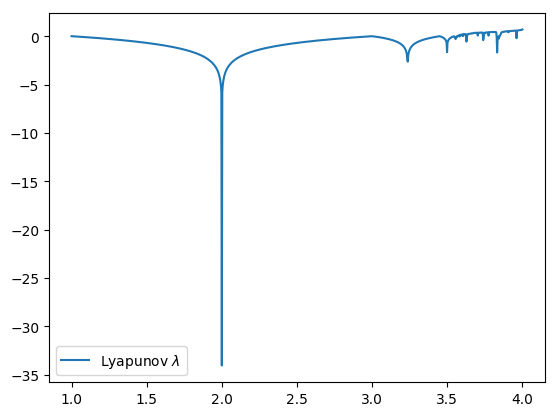

In [13]:
plot(r,L[1],label=L"Lyapunov $\lambda$")#recordemos que la primera parte de L es justamente los coeficientes de liapunov, que 
#los que graficamos aqui
legend();

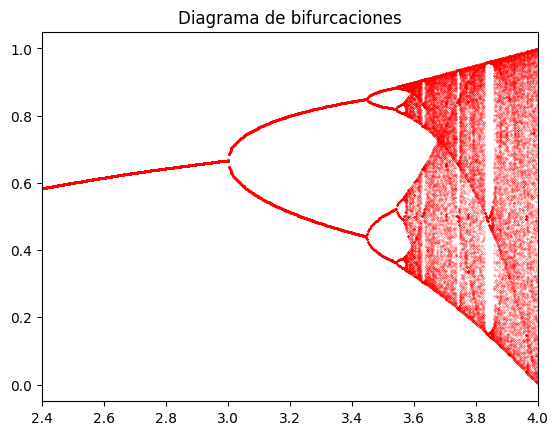

In [14]:
plot(L[2],L[3],"r.",markersize=0.3)#de manera analoga recordamos que la segunda parte es r y la tercera x_n para n grande
title("Diagrama de bifurcaciones")
xlim(2.4,4);

ahora juntemos las dos graficas en una sola imagen para hacer algunas observaciones

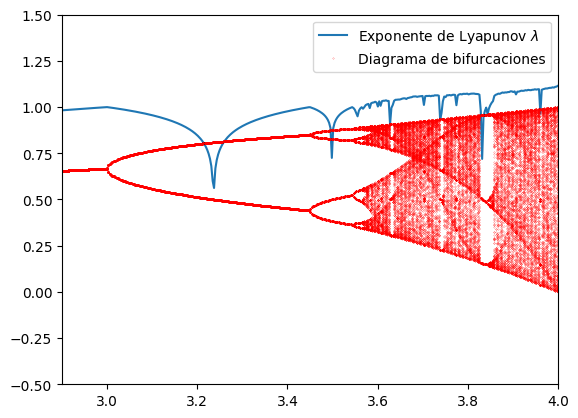

In [17]:
plot(r,(1/6)*L[1]+1,label=L"Exponente de Lyapunov $\lambda$")
plot(L[2],L[3],"r.",markersize=0.3,label="Diagrama de bifurcaciones")
xlim(2.9,4);
ylim(-0.5,1.5);
legend();

de esta imagen se observa que las bifurcaciones ocurren en donde la derivada de la gráfica es discontinua, por otra parte se puede observar una cosa interesante, mientras que al inicio solo hay soluciones que tienden a uno, dos o cuatro posibles valores al infinito mas adelante lo hacen para muchos mas, incluso podriamos hablar de una infinidad, por lo cual quiere decir que para esos valores las condiciones iniciales aunque sean cercanas a la larga uno puede terminar en un lugar totalmente diferente, por lo cual hay caos en estos casos, sin embargo un poco mas de ayá de $3.8$ se pyede observar que hay una pequeña región sin caos para despues volver al caos